## Collaborative Filtering

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
user = pd.read_csv("../data/datasets/user.csv")
user

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20
...,...,...,...
295,296,"Lampung, Sumatera Selatan",31
296,297,"Palembang, Sumatera Selatan",39
297,298,"Bogor, Jawa Barat",38
298,299,"Sragen, Jawa Tengah",27


In [3]:
rat = pd.read_csv("../data/datasets/tourism_rating.csv")
rat

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [4]:
update = pd.read_csv('../data/datasets/updated/tourism_with_id_updated.csv')
update

,Place_Id,Place_Name,Description,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,new_category
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,"['Budaya', 'Keluarga']"
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,['Budaya']
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,"['Hiburan', 'Keluarga']"
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,"['Budaya', 'Hiburan']"
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,"['Petualangan', 'Hiburan']"
...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,"['Sejarah', 'Budaya']"
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,"['Alam', 'Relaksasi']"
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,"['Alam', 'Hiburan']"
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,"['Alam', 'Relaksasi']"


In [5]:
tourism_name = pd.merge(rat, update[['Place_Id', 'new_category']], on = 'Place_Id', how = 'left')
tourism_all = pd.merge(tourism_name, update[['Place_Id', 'Place_Name']], on = 'Place_Id', how = 'left')
tourism_all

,User_Id,Place_Id,Place_Ratings,new_category,Place_Name
0,1,179,3,['Budaya'],Candi Ratu Boko
1,1,344,2,"['Alam', 'Relaksasi', 'Keluarga']",Pantai Marina
2,1,5,5,"['Petualangan', 'Hiburan']",Atlantis Water Adventure
3,1,373,3,"['Budaya', 'Sejarah']",Museum Kereta Ambarawa
4,1,101,4,['Budaya'],Kampung Wisata Sosro Menduran
...,...,...,...,...,...
9995,300,425,2,"['Hiburan', 'Keluarga']",Waterpark Kenjeran Surabaya
9996,300,64,4,['Budaya'],Museum Sasmita Loka Ahmad Yani
9997,300,311,3,"['Alam', 'Relaksasi']",The Lodge Maribaya
9998,300,279,4,['Budaya'],Masjid Agung Trans Studio Bandung


In [6]:
prep = tourism_all
prep.sort_values('Place_Id')
prep = prep.drop_duplicates('Place_Id')
prep


,User_Id,Place_Id,Place_Ratings,new_category,Place_Name
0,1,179,3,['Budaya'],Candi Ratu Boko
1,1,344,2,"['Alam', 'Relaksasi', 'Keluarga']",Pantai Marina
2,1,5,5,"['Petualangan', 'Hiburan']",Atlantis Water Adventure
3,1,373,3,"['Budaya', 'Sejarah']",Museum Kereta Ambarawa
4,1,101,4,['Budaya'],Kampung Wisata Sosro Menduran
...,...,...,...,...,...
2008,62,370,1,"['Sejarah', 'Budaya']",Benteng Pendem
2399,74,350,4,"['Alam', 'Relaksasi', 'Keluarga']",Pantai Cipta
2448,75,10,2,"['Alam', 'Petualangan']",Pulau Tidung
2534,78,7,4,"['Keluarga', 'Alam']",Kebun Binatang Ragunan


In [7]:
colfil = prep
colfil

,User_Id,Place_Id,Place_Ratings,new_category,Place_Name
0,1,179,3,['Budaya'],Candi Ratu Boko
1,1,344,2,"['Alam', 'Relaksasi', 'Keluarga']",Pantai Marina
2,1,5,5,"['Petualangan', 'Hiburan']",Atlantis Water Adventure
3,1,373,3,"['Budaya', 'Sejarah']",Museum Kereta Ambarawa
4,1,101,4,['Budaya'],Kampung Wisata Sosro Menduran
...,...,...,...,...,...
2008,62,370,1,"['Sejarah', 'Budaya']",Benteng Pendem
2399,74,350,4,"['Alam', 'Relaksasi', 'Keluarga']",Pantai Cipta
2448,75,10,2,"['Alam', 'Petualangan']",Pulau Tidung
2534,78,7,4,"['Keluarga', 'Alam']",Kebun Binatang Ragunan


In [8]:
colfil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 0 to 2918
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User_Id        437 non-null    int64 
 1   Place_Id       437 non-null    int64 
 2   Place_Ratings  437 non-null    int64 
 3   new_category   437 non-null    object
 4   Place_Name     437 non-null    object
dtypes: int64(3), object(2)
memory usage: 20.5+ KB


In [9]:
user_ids = colfil['User_Id'].unique().tolist()
print('list User_Id : ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User_Id : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User_Id : ', user_encoded_to_user)

list User_Id :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 51, 52, 53, 54, 55, 60, 62, 74, 75, 78, 90]
encoded User_Id :  {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 35: 33, 36: 34, 37: 35, 38: 36, 39: 37, 40: 38, 41: 39, 42: 40, 43: 41, 44: 42, 45: 43, 47: 44, 48: 45, 51: 46, 52: 47, 53: 48, 54: 49, 55: 50, 60: 51, 62: 52, 74: 53, 75: 54, 78: 55, 90: 56}
encoded angka ke User_Id :  {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 35, 34: 36, 35: 37, 36: 38, 3

In [10]:
place_ids = colfil['Place_Id'].unique().tolist()
print('list Place_Id : ', place_ids)

place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}
print('encoded Place_Id : ', place_to_place_encoded)

place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}
print('encoded angka ke Place_Id : ', place_encoded_to_place)

list Place_Id :  [179, 344, 5, 373, 101, 312, 258, 20, 154, 393, 103, 208, 89, 405, 41, 336, 67, 292, 222, 76, 428, 15, 246, 265, 21, 328, 307, 302, 48, 147, 2, 322, 23, 85, 371, 78, 111, 107, 185, 413, 389, 437, 105, 176, 407, 281, 167, 384, 426, 390, 367, 166, 18, 321, 262, 223, 17, 319, 310, 421, 202, 283, 250, 118, 54, 70, 33, 227, 86, 249, 131, 382, 193, 104, 24, 128, 134, 228, 237, 100, 198, 50, 376, 268, 242, 82, 348, 409, 88, 4, 377, 43, 91, 44, 14, 406, 383, 229, 290, 294, 309, 74, 97, 138, 436, 395, 300, 68, 55, 434, 9, 151, 61, 159, 397, 391, 301, 143, 27, 190, 346, 381, 368, 433, 420, 335, 115, 334, 219, 178, 266, 92, 64, 102, 257, 243, 116, 359, 121, 385, 398, 119, 298, 410, 224, 379, 255, 269, 213, 126, 192, 183, 129, 303, 296, 99, 148, 13, 247, 31, 77, 158, 306, 98, 235, 45, 173, 275, 25, 130, 164, 267, 56, 30, 238, 402, 196, 417, 304, 206, 211, 28, 264, 403, 253, 331, 188, 416, 378, 233, 95, 204, 225, 341, 145, 36, 168, 12, 280, 236, 42, 90, 75, 63, 205, 234, 284, 230, 

In [11]:
colfil['user'] = colfil['User_Id'].map(user_to_user_encoded)
colfil['place'] = colfil['Place_Id'].map(place_to_place_encoded)

C:\Users\HP\AppData\Local\Temp\ipykernel_30244\3138897235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colfil['user'] = colfil['User_Id'].map(user_to_user_encoded)
C:\Users\HP\AppData\Local\Temp\ipykernel_30244\3138897235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colfil['place'] = colfil['Place_Id'].map(place_to_place_encoded)


In [12]:
num_users = len(user_to_user_encoded)
print(num_users)

num_places = len(place_encoded_to_place)
print(num_places)

colfil['Place_Ratings'] = colfil['Place_Ratings'].values.astype(np.float32)

min_rating = min(colfil['Place_Ratings'])

max_rating = max(colfil['Place_Ratings'])

print('Number of User : {}, Number of Place : {}, Min Rating {}, Max Rating {}'.format(
    num_users, num_places, min_rating, max_rating
))

57
437
Number of User : 57, Number of Place : 437, Min Rating 1.0, Max Rating 5.0


C:\Users\HP\AppData\Local\Temp\ipykernel_30244\150207138.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colfil['Place_Ratings'] = colfil['Place_Ratings'].values.astype(np.float32)


In [13]:
colfil = colfil.sample(frac = 1, random_state = 30)
colfil

,User_Id,Place_Id,Place_Ratings,new_category,Place_Name,user,place
324,12,49,5.0,['Budaya'],Galeri Indonesia Kaya,11,224
350,12,293,5.0,"['Alam', 'Relaksasi']",Taman Badak,11,236
334,12,65,2.0,['Budaya'],Museum Basoeki Abdullah,11,230
369,13,156,3.0,"['Alam', 'Romantis', 'Keluarga']",Pantai Pulang Sawal,12,241
82,3,24,4.0,['Budaya'],Museum Nasional,2,74
...,...,...,...,...,...,...,...
165,6,398,5.0,"['Alam', 'Keluarga']",Taman Buah Surabaya,5,140
556,18,261,2.0,"['Alam', 'Relaksasi']",Ciwangun Indah Camp Official,17,301
1760,54,361,1.0,"['Alam', 'Relaksasi']",Wisata Kampung Krisan Clapar,49,429
1432,45,146,4.0,"['Alam', 'Relaksasi']",Bukit Wisata Pulepayung,43,421


In [14]:
x = colfil[['user', 'place']].values

y = colfil['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * update.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 11 224]
 [ 11 236]
 [ 11 230]
 [ 12 241]
 [  2  74]
 [ 14 259]
 [  9 197]
 [ 24 351]
 [  9 198]
 [  6 154]
 [ 29 382]
 [ 19 318]
 [  9 208]
 [  3  90]
 [ 54 434]
 [ 10 215]
 [ 15 276]
 [  3 100]
 [ 51 431]
 [ 16 286]
 [  1  31]
 [ 28 379]
 [ 14 268]
 [  0  22]
 [  6 150]
 [  6 147]
 [  8 178]
 [ 13 249]
 [ 15 272]
 [  4 118]
 [  4 103]
 [  9 195]
 [  2  67]
 [ 11 235]
 [ 10 211]
 [ 29 381]
 [  7 171]
 [  5 128]
 [ 53 433]
 [ 16 282]
 [ 20 329]
 [ 18 306]
 [  5 129]
 [  7 167]
 [ 22 339]
 [  5 132]
 [ 30 389]
 [  0   0]
 [ 16 290]
 [  5 138]
 [ 26 367]
 [  0   3]
 [ 16 281]
 [ 13 254]
 [ 21 335]
 [ 11 225]
 [  2  60]
 [  8 193]
 [ 10 213]
 [ 49 428]
 [  1  38]
 [ 31 392]
 [ 10 220]
 [ 43 422]
 [  0  27]
 [  6 148]
 [  4 110]
 [  4 117]
 [ 18 304]
 [ 10 217]
 [ 11 222]
 [  1  35]
 [ 10 221]
 [  3  92]
 [  2  70]
 [ 21 337]
 [  8 183]
 [  4 112]
 [  9 205]
 [ 29 385]
 [ 29 380]
 [ 30 391]
 [  3  87]
 [  2  76]
 [ 18 314]
 [  0  10]
 [  6 155]
 [ 38 411]
 [ 19 319]
 [ 33 397]
 [  0  13]

In [20]:
print(y_train)

[1.   1.   0.25 0.5  0.75 1.   0.25 0.5  0.75 0.5  0.75 0.5  0.5  0.5
 0.25 0.75 1.   1.   0.75 0.75 0.75 0.25 0.5  0.75 1.   0.5  0.75 0.25
 1.   0.25 0.25 0.75 0.25 0.5  0.25 0.25 0.75 0.25 0.75 0.5  0.75 0.25
 0.5  0.5  0.5  1.   0.25 0.5  0.75 0.75 0.25 0.5  0.25 0.5  0.25 1.
 1.   1.   1.   0.5  0.25 0.75 0.5  0.5  0.25 0.5  1.   0.75 0.75 0.25
 0.5  1.   0.5  0.5  0.75 0.5  0.5  0.5  0.5  1.   0.75 1.   0.5  0.5
 0.75 0.5  0.75 0.75 0.5  1.   1.   1.   0.75 0.5  1.   0.75 0.75 0.25
 0.25 0.75 1.   0.5  0.25 0.5  0.5  0.5  0.5  0.5  0.25 0.5  0.5  0.25
 0.75 0.25 0.5  0.25 1.   0.25 0.25 0.5  0.25 1.   0.5  1.   0.75 0.5
 0.5  0.5  0.25 1.   0.5  1.   0.25 0.25 1.   1.   0.25 0.75 1.   1.
 1.   0.25 0.25 1.   1.   0.25 0.75 1.   0.   0.25 0.25 1.   0.25 1.
 1.   0.75 0.5  1.   0.5  1.   0.25 0.25 0.5  0.5  0.5  1.   0.5  1.
 0.25 0.25 0.25 0.5  1.   0.25 0.5  0.75 1.   0.5  1.   0.25 1.   0.25
 0.25 0.75 1.   0.5  1.   0.75 0.25 0.25 0.75 1.   1.   1.   1.   1.
 1.   0.75 0.5  0.5

In [15]:
class RecommenderNet(tf.keras.Model):
 
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )

    self.user_bias = layers.Embedding(num_users, 1)
    self.places_embedding = layers.Embedding(
        num_places,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.places_bias = layers.Embedding(num_places, 1)
  
  def call(self, inputs) :
    user_vector = self.user_embedding(inputs[:, 0])
    user_bias = self.user_bias(inputs[:, 0])
    places_vector = self.places_embedding(inputs[:, 1])
    places_bias = self.places_bias(inputs[:, 1])

    dot_user_places = tf.tensordot(user_vector, places_vector, 2)

    x = dot_user_places + user_bias + places_bias

    return tf.nn.sigmoid(x)

In [16]:
model = RecommenderNet(num_users, num_places, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.0004),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

In [17]:
#  class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('val_root_mean_squared_error')<0.25):
#       print('Lapor! Metriks validasi sudah sesuai harapan')
#       self.model.stop_training = True

In [18]:
history = model.fit(x = x_train, y = y_train, batch_size = 8, epochs = 100, validation_data = (x_val, y_val))

Epoch 1/100
44/44 [==============================] - 1s 7ms/step - loss: 0.7022 - root_mean_squared_error: 0.3090 - val_loss: 0.7208 - val_root_mean_squared_error: 0.3340
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 0.6883 - root_mean_squared_error: 0.2977 - val_loss: 0.7186 - val_root_mean_squared_error: 0.3323
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 0.6791 - root_mean_squared_error: 0.2899 - val_loss: 0.7161 - val_root_mean_squared_error: 0.3305
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 0.6740 - root_mean_squared_error: 0.2854 - val_loss: 0.7137 - val_root_mean_squared_error: 0.3288
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 0.6706 - root_mean_squared_error: 0.2827 - val_loss: 0.7115 - val_root_mean_squared_error: 0.3272
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.6649 - root_mean_squared_error: 0.2778 - val_loss: 0.7096 - val_root_m

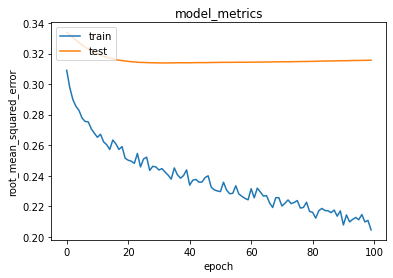

In [19]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()